# Exercises

In [1]:
import acquire
from prepare import zillow_scale
from wrangle import acquire, prep, wrangle_zillow
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
from explore import plot_variable_pairs, plot_categorical_and_continuous_vars
import evaluate
from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline

## Load your zillow dataset.

In [2]:
df = wrangle_zillow()

In [3]:
train_and_validate, test = train_test_split(df, random_state=117)
train, validate = train_test_split(train_and_validate)

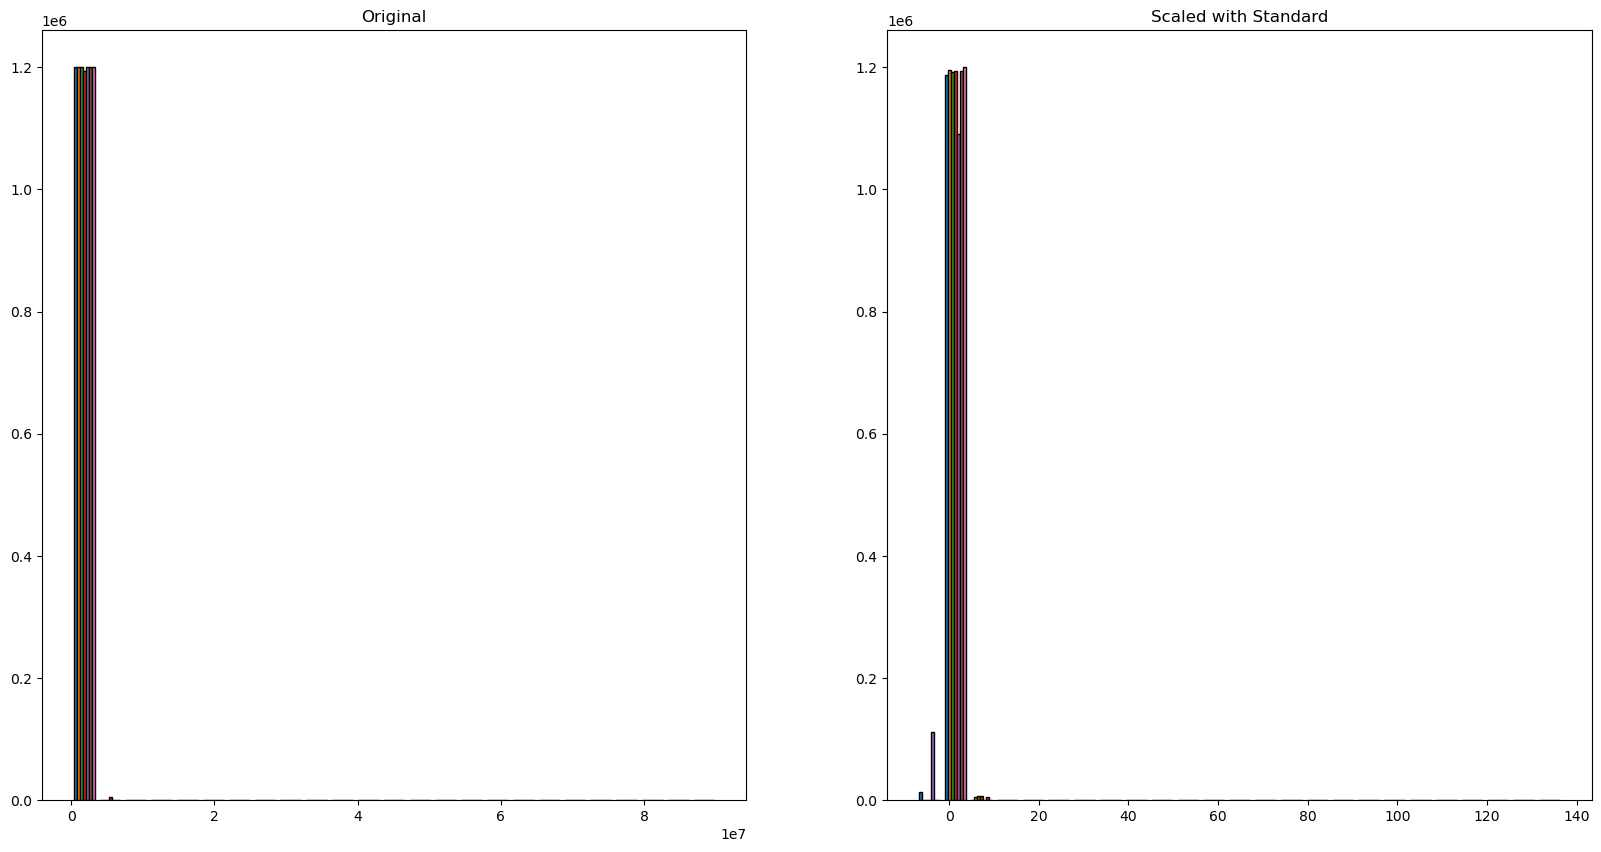

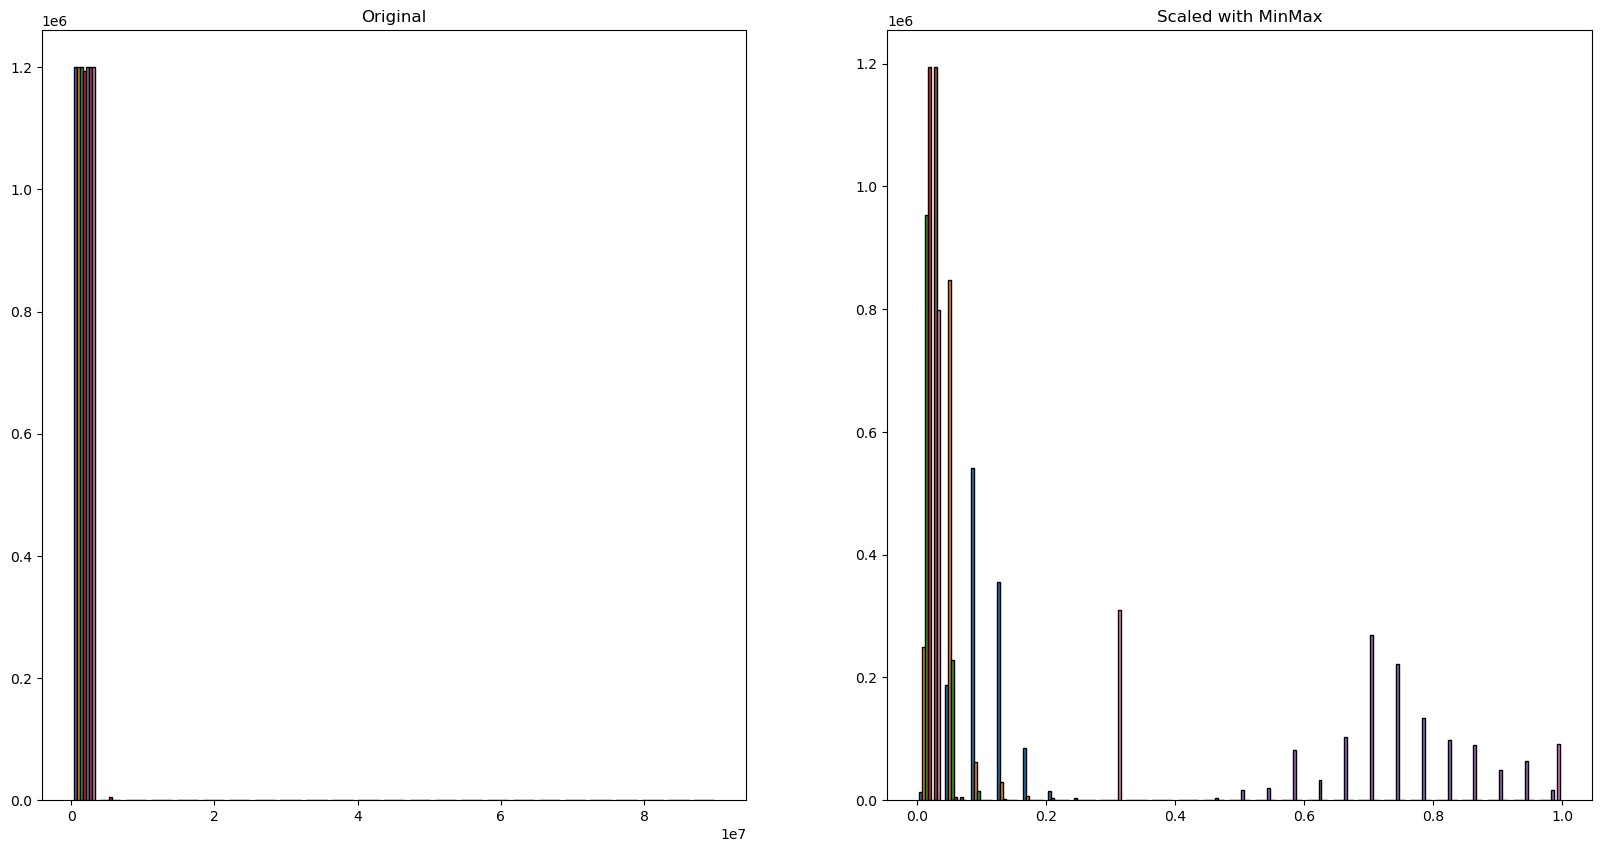

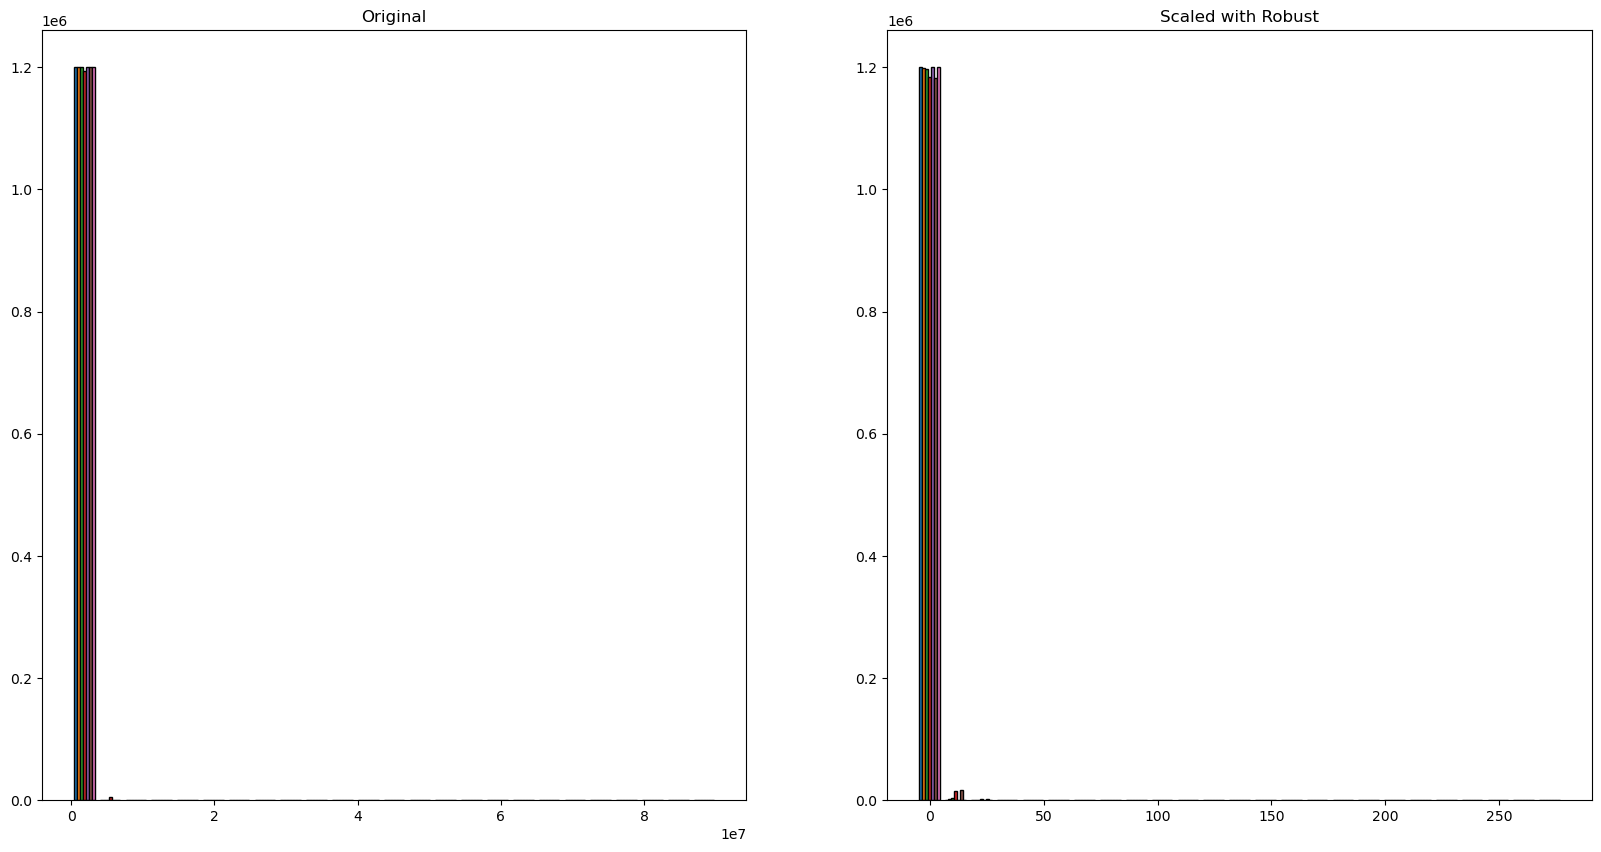

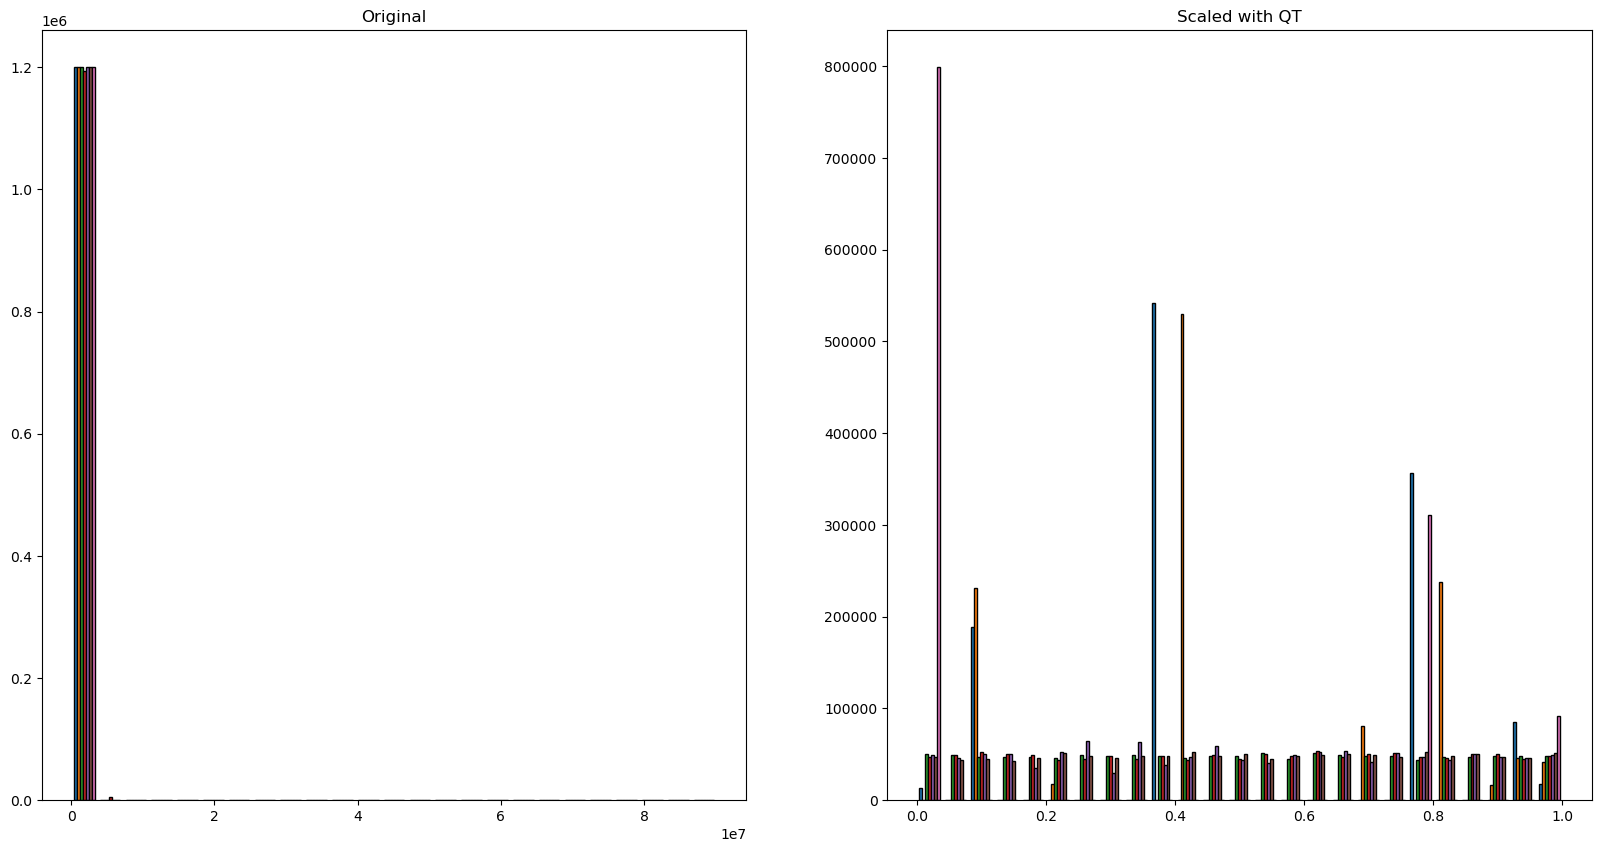

In [4]:
scaler = StandardScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with Standard')
plt.show()

scaler = MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with MinMax')
plt.show()


scaler = RobustScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with Robust')
plt.show()


scaler = QuantileTransformer()

scaler.fit(train)

train_scaled = scaler.transform(train)


plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled with QT')
plt.show()

In [5]:
train.head()

,beds,baths,square_feet,value,year_built,tax_amount,federal_processing_code
1704252,3,2.0,1516,1035533,1975,12381.64,6037
2030762,3,1.0,990,213264,1944,2793.00,6037
1073568,4,2.0,1333,233688,1977,2921.28,6037
1675062,4,3.0,2375,470481,1989,5816.06,6037
638212,3,3.0,1745,588876,1948,7265.74,6037


## Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.
### Here is some sample code to get you started:

In [6]:
x = train['square_feet']
y = train['value']

In [6]:
train['yhat_baseline'] = y.mean()
train.head(3)

,beds,baths,square_feet,value,year_built,tax_amount,federal_processing_code,yhat_baseline
316462,2,1.0,1809,557757,1940,6174.26,6037,460895.093729
854548,3,3.0,2391,173891,1964,2254.66,6037,460895.093729
327902,4,2.0,1582,319823,1928,4410.74,6037,460895.093729


### Modify and add to the code above as necessary for it to work with the zillow dataset.

In [7]:
ols_model = LinearRegression().fit(train[['square_feet']], y)
train['yhat'] = ols_model.predict(train[['square_feet']])
train.head()

,beds,baths,square_feet,value,year_built,tax_amount,federal_processing_code,yhat_baseline,yhat
316462,2,1.0,1809,557757,1940,6174.26,6037,460895.093729,437458.426133
854548,3,3.0,2391,173891,1964,2254.66,6037,460895.093729,688593.583692
327902,4,2.0,1582,319823,1928,4410.74,6037,460895.093729,339507.084611
220319,2,1.0,796,208235,1944,2865.98,6037,460895.093729,345.170794
691865,4,3.0,1851,416667,1988,6432.74,6037,460895.093729,455581.581833


## Plot the residuals for the linear regression model that you made.

In [8]:
train['residual'] = train['yhat'] - y
train['residual_baseline'] = train['yhat_baseline'] - y
train.head()

,beds,baths,square_feet,value,year_built,tax_amount,federal_processing_code,yhat_baseline,yhat,residual,residual_baseline
316462,2,1.0,1809,557757,1940,6174.26,6037,460895.093729,437458.426133,-120298.573867,-96861.906271
854548,3,3.0,2391,173891,1964,2254.66,6037,460895.093729,688593.583692,514702.583692,287004.093729
327902,4,2.0,1582,319823,1928,4410.74,6037,460895.093729,339507.084611,19684.084611,141072.093729
220319,2,1.0,796,208235,1944,2865.98,6037,460895.093729,345.170794,-207889.829206,252660.093729
691865,4,3.0,1851,416667,1988,6432.74,6037,460895.093729,455581.581833,38914.581833,44228.093729


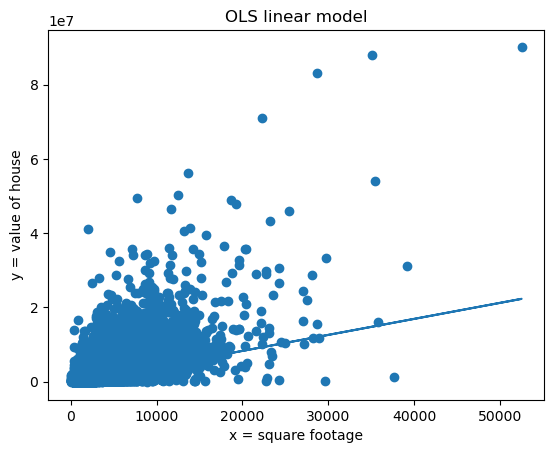

In [9]:
plt.scatter(train[['square_feet']], y)
plt.plot(train[['square_feet']], train['yhat'])
plt.xlabel('x = square footage')
plt.ylabel('y = value of house')
plt.title('OLS linear model')
plt.show()

## Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [10]:
train['residual_baseline_sqr'] = train.residual_baseline**2
train['residual_sqr'] = train.residual**2

In [11]:
SSE_baseline = train.residual_baseline_sqr.sum()
SSE = train.residual_sqr.sum()

MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

RMSE = MSE**.5
RMSE_baseline = MSE_baseline**.5

ESS = sum((train['yhat'] - y.mean())**2)

TSS = ESS + SSE

In [12]:
print(f'-------------------------------\n\n\
Sum of Squared Errors:\n\n\
{SSE}\n\n\
-------------------------------\n\n\
Explained Sum of Squares:\n\n\
{ESS}\n\n\
-------------------------------\n\n\
Total Sum of Squares:\n\n\
{TSS}\n\n\
-------------------------------\n\n\
Mean Squared Error:\n\n\
{MSE}\n\n\
-------------------------------\n\n\
Root Mean Squared Error:\n\n\
{RMSE}\n\n\
-------------------------------\n\
')

-------------------------------

Sum of Squared Errors:

3.519985571554063e+17

-------------------------------

Explained Sum of Squares:

2.0652508659906573e+17

-------------------------------

Total Sum of Squares:

5.58523643754472e+17

-------------------------------

Mean Squared Error:

293115957943.855

-------------------------------

Root Mean Squared Error:

541401.8451611104

-------------------------------



## Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [13]:
print(f'-------------------------------\n\n\
Sum of Squared Errors Baseline:\n\n\
SSE Baseline:\n{SSE_baseline}\n\n\
-------------------------------\n\n\
Mean Squared Error Baseline:\n\n\
MSE Baseline:\n{MSE_baseline}\n\n\
-------------------------------\n\n\
Root Mean Squared Error Baseline:\n\n\
RMSE Baseline:\n{RMSE_baseline}\n\n\
-------------------------------\n\
')

-------------------------------

Sum of Squared Errors Baseline:

SSE Baseline:
5.5852364375456416e+17

-------------------------------

Mean Squared Error Baseline:

MSE Baseline:
465093363439.93317

-------------------------------

Root Mean Squared Error Baseline:

RMSE Baseline:
681977.5388089649

-------------------------------



## Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [14]:
print(f'Sum of Squared Error Comparison:\n\n\
Model:\n{SSE}\n\n\
Baseline:\n{SSE_baseline}\n\n')
if SSE < SSE_baseline:
    print(f'Our model outperformed our baseline by {SSE_baseline - SSE}')
else:
    print(f'The baseline outperformed our model by {SSE - SSE_baseline}')

Sum of Squared Error Comparison:

Model:
3.519985571554063e+17

Baseline:
5.5852364375456416e+17


Our model outperformed our baseline by 2.065250865991579e+17


## What is the amount of variance explained in your model?

In [15]:
r2_score(y, train.yhat)

0.3697696398505783

## Is your model better than the baseline model?

### Yes, my model minimized the SSE more, creating a better line of fit than baseline.

## Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
  - sum of squared errors (SSE)
  - explained sum of squares (ESS)
  - total sum of squares (TSS)
  - mean squared error (MSE)
  - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

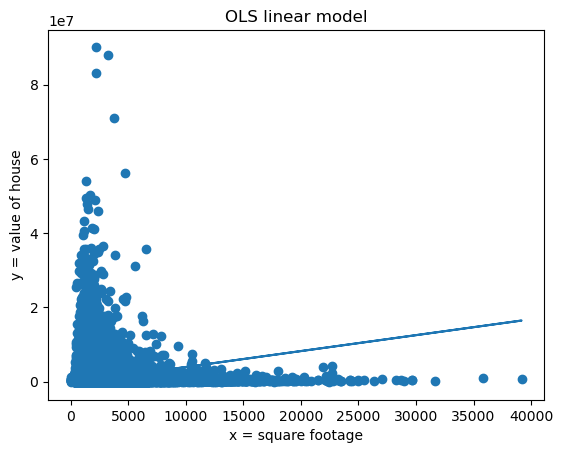

In [16]:
plot_residuals(y,train['yhat'])

In [17]:
regression_errors(y,train.yhat)

-------------------------------

    Sum of Squared Errors:

    3.49614299977397e+17

    -------------------------------

    Explained Sum of Squares:

    2.031198796532115e+17

    -------------------------------

    Total Sum of Squares:

    5.527341796306085e+17

    -------------------------------

    Mean Squared Error:

    291130541207.024

    -------------------------------

    Root Mean Squared Error:

    539565.1408375304

    -------------------------------
    


In [18]:
baseline_mean_errors(y, train['yhat'])

-------------------------------

    Sum of Squared Errors Baseline:

    SSE Baseline:
5.527341796306587e+17

    -------------------------------

    Mean Squared Error Baseline:

    MSE Baseline:
460272365489.33386

    -------------------------------

    Root Mean Squared Error Baseline:

    RMSE Baseline:
678433.7591020466

    -------------------------------
    
